In [1]:
import pickle
import numpy as np
import pandas as pd

In [2]:
# with open("data_storage/small_dataset.obj", "rb") as file:
#     data = pickle.load(file)

with open("data_storage/Extended_manhattan_pooling.obj", "rb") as file:
    data = pickle.load(file)

In [3]:
data[0]["requests"][:3]

,id,pickup_datetime,dropoff_datetime,trip_duration,origin,destination,status,dist,treq,ttrav,...,u_PT,ride_id,ttrav_sh,u_sh,kind,position,x_org,y_org,x_dest,y_dest
0,id0190469,2016-01-01 00:00:17,2016-01-01 00:14:26,849,42427352,42438018,0,14340,0,2390,...,999999,306,2591,29.772825,21,0,-73.981942,40.719462,-73.938959,40.828984
1,id1210365,2016-01-01 00:01:01,2016-01-01 00:07:49,408,42432756,42434113,0,2640,44,440,...,999999,1,440,5.500000,1,0,-73.965196,40.801107,-73.947489,40.815207
2,id3991965,2016-01-01 00:20:08,2016-01-01 00:29:16,548,42437917,42434113,0,2705,1191,450,...,999999,118,450,5.632500,1,0,-73.963370,40.798568,-73.947489,40.815207


In [4]:
concatenated_data = pd.concat([d["requests"] for d in data])

In [5]:
concatenated_data[:1]

,id,pickup_datetime,dropoff_datetime,trip_duration,origin,destination,status,dist,treq,ttrav,...,u_PT,ride_id,ttrav_sh,u_sh,kind,position,x_org,y_org,x_dest,y_dest
0,id0190469,2016-01-01 00:00:17,2016-01-01 00:14:26,849,42427352,42438018,0,14340,0,2390,...,999999,306,2591,29.772825,21,0,-73.981942,40.719462,-73.938959,40.828984


In [6]:
len(concatenated_data)

4908349

In [7]:
# df.to_csv('KPI_results+.csv')

In [8]:
import h3
import folium
from geojson.feature import Feature, FeatureCollection
import json
import osmnx as ox

In [9]:
# add hexagon column to the DataFrame
df = concatenated_data
zoning_level = 9
df['h3_address'] = df.apply(lambda row: h3.geo_to_h3(row.y_org, row.x_org, zoning_level), axis=1)


In [10]:
df.pickup_datetime = df.apply(lambda row: pd.Timestamp(row.pickup_datetime), axis=1) #convert "pickup_datetime" to time type

In [11]:
df.dropoff_datetime = df.apply(lambda row: pd.Timestamp(row.dropoff_datetime), axis=1) #convert "dropoff_datetime" to time type

In [12]:
df['del_PassHourTrav']=abs((df['ttrav']-df['ttrav_sh'])/df['ttrav_sh'])
df['del_PassUtility']=abs((df['u']-df['u_sh'])/df['u_sh'])
df

,id,pickup_datetime,dropoff_datetime,trip_duration,origin,destination,status,dist,treq,ttrav,...,u_sh,kind,position,x_org,y_org,x_dest,y_dest,h3_address,del_PassHourTrav,del_PassUtility
0,id0190469,2016-01-01 00:00:17,2016-01-01 00:14:26,849,42427352,42438018,0,14340,0,2390,...,29.772825,21,0,-73.981942,40.719462,-73.938959,40.828984,892a100d37bffff,0.077576,0.003432
1,id1210365,2016-01-01 00:01:01,2016-01-01 00:07:49,408,42432756,42434113,0,2640,44,440,...,5.500000,1,0,-73.965196,40.801107,-73.947489,40.815207,892a1008887ffff,0.000000,0.000000
2,id3991965,2016-01-01 00:20:08,2016-01-01 00:29:16,548,42437917,42434113,0,2705,1191,450,...,5.632500,1,0,-73.963370,40.798568,-73.947489,40.815207,892a10088b3ffff,0.000000,0.000000
3,id3888279,2016-01-01 00:01:14,2016-01-01 00:05:54,280,42445649,4461990857,0,1067,57,177,...,2.220000,1,0,-73.982236,40.751569,-73.991099,40.750342,892a100d66fffff,0.000000,0.000000
4,id3058472,2016-01-01 00:27:06,2016-01-01 00:37:26,620,42430688,4461990857,0,2133,1609,355,...,4.442000,1,0,-73.996437,40.763367,-73.991099,40.750342,892a107258fffff,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,id3016059,2016-06-30 23:58:37,2016-07-01 00:08:58,621,4347534783,42453008,0,2527,1713,421,...,5.264000,1,0,-73.972524,40.764899,-73.972292,40.748187,892a100d6c7ffff,0.000000,0.000000
146,id2105228,2016-06-30 23:58:38,2016-07-01 00:09:34,656,42432693,42454742,0,3576,1714,596,...,6.741520,20,1,-73.979447,40.755396,-74.003874,40.738129,892a100d677ffff,0.055468,0.105092
147,id3952659,2016-06-30 23:58:47,2016-07-01 00:12:56,849,4461990857,42430981,0,3739,1723,623,...,6.991955,32,2,-73.991099,40.750342,-73.989081,40.773489,892a100d2c3ffff,0.001608,0.113995
148,id1255468,2016-06-30 23:58:52,2016-07-01 00:06:44,472,4597668044,42436707,0,2227,1728,371,...,4.639000,1,0,-73.982789,40.745206,-73.969389,40.757701,892a100d28fffff,0.000000,0.000000


In [13]:
df.del_PassHourTrav.mean()

0.02218592423106323

In [14]:
df.del_PassUtility.mean()

0.02061015407682008

In [92]:
# Here are some visualization functions to check the hexagons without colorbar.

def visualize_hexagons(hexagons, color="red", w=1, folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    
    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=11, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=w,color=color,fill= True)
        m.add_child(my_PolyLine)
    return m
    

def visualize_polygon(polyline, color):
    polyline.append(polyline[0])
    lat = [p[0] for p in polyline]
    lng = [p[1] for p in polyline]
    m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=11, tiles='cartodbpositron')
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
    m.add_child(my_PolyLine)
    return m

In [93]:
# Using the above function you can visualize the hexagons.

hexagons = list(df.h3_address.unique())
visualize_hexagons(hexagons, color="grey", w=1, folium_map=None)

In [94]:
import selenium

import networkx as nx
import random
import seaborn as sns

In [95]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from bisect import bisect

In [19]:
df_m = pd.read_csv("new_michals_figure.csv").sort_values(['0'], ascending=False, ignore_index=True)

In [20]:
arr = np.cumsum(df_m['0'].to_numpy())
def foo(t):
    return bisect(arr, arr[-1]*t)
percents = [foo(t) for t in [0.25, 0.5, 0.75]]
percents

[26, 70, 138]

In [21]:
print(f'25%: {arr[26]/arr[-1]}, 50%: {arr[70]/arr[-1]}, 75%: {arr[138]/arr[-1]}')

25%: 0.25643009455070676, 50%: 0.5027912142320653, 75%: 0.7516820606997772


In [22]:
arr_normalised = arr/arr[-1]
arr_normalised = np.append([0], arr_normalised) # to start from 0, 0

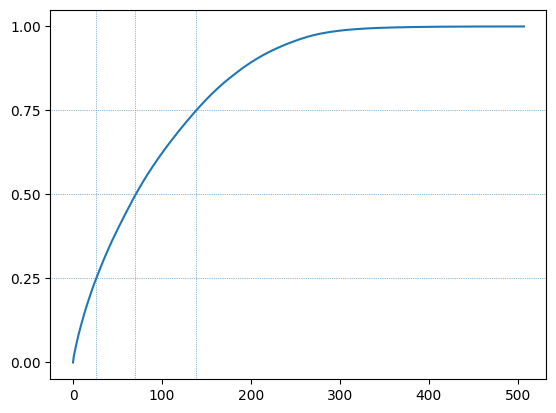

In [23]:
fig, ax = plt.subplots()
plt.plot(arr_normalised)
for p, pp in zip(percents, [0.25, 0.5, 0.75]):
    ax.axvline(p, ls=':', lw=0.5)
    ax.axhline(pp, ls=':', lw=0.5)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.show()
plt.close()

In [24]:
import matplotlib.ticker as mtick

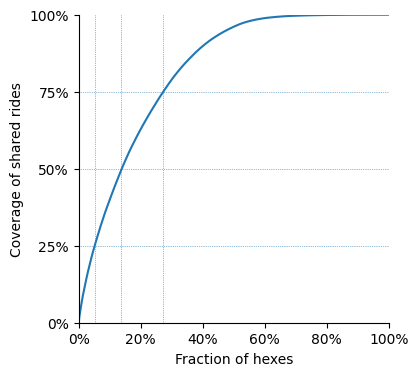

In [25]:
fig, ax = plt.subplots(figsize = (4,4))
plt.plot([t/len(arr_normalised)*100 for t in range(len(arr_normalised))], [t*100 for t in arr_normalised])
for p, pp in zip([t/len(arr_normalised)*100 for t in percents], [25, 50, 75]):
    ax.axvline(p, ls=':', lw=0.5)
    ax.axhline(pp, ls=':', lw=0.5)
ax.set_yticks([0, 25, 50, 75, 100])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xlabel='Fraction of hexes', ylabel='Coverage of shared rides', ylim=[0, 100], xlim=[0, 100])
plt.show()
plt.close()
fig.savefig('F9.jpg', dpi=300)

In [125]:
# to plot the KPIs you need to groupby the requests by their hexagon address
# according to you purpose you may use groupby().mean() or groupby().sum()

df_new = df.groupby(['h3_address']).mean()
df_new.reset_index(inplace=True)
df_new

C:\Users\shuli\AppData\Local\Temp\ipykernel_26272\2858625705.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_new = df.groupby(['h3_address']).mean()


,h3_address,trip_duration,origin,destination,status,dist,treq,ttrav,VoT,delta,...,kind,position,x_org,y_org,x_dest,y_dest,del_PassHourTrav,del_PassUtility,number_of_req,number_of_req_sh
0,892a1008803ffff,847.052632,4.193894e+08,4.488115e+08,0.0,3802.157895,774.105263,633.263158,0.0035,179.761596,...,6.868421,0.039474,-73.974041,40.797709,-73.978387,40.775798,0.023372,0.013371,1.0,0.276316
1,892a1008807ffff,725.584052,4.215707e+08,5.837664e+08,0.0,3093.157321,885.581536,515.114606,0.0035,146.268554,...,7.477774,0.168943,-73.971965,40.794979,-73.967005,40.788113,0.017864,0.017007,1.0,0.308291
2,892a100880fffff,824.166667,1.013633e+09,1.375909e+08,0.0,3598.733333,864.650000,599.350000,0.0035,170.151319,...,8.458333,0.150000,-73.975798,40.795267,-73.972541,40.780451,0.022016,0.017982,1.0,0.337500
3,892a1008813ffff,853.807692,2.332930e+08,2.673655e+08,0.0,3941.576923,804.615385,656.500000,0.0035,186.349451,...,9.230769,0.153846,-73.971639,40.800187,-73.972202,40.782748,0.018590,0.023679,1.0,0.413462
4,892a1008817ffff,760.195462,2.339739e+08,5.675582e+08,0.0,3205.039376,881.763244,533.754401,0.0035,151.585294,...,7.802453,0.134479,-73.970362,40.797762,-73.971382,40.782189,0.020673,0.017145,1.0,0.324101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,892a1072dcbffff,764.835239,1.377229e+09,4.806957e+08,0.0,3370.110289,930.325488,561.302623,0.0035,159.410166,...,7.388702,0.063215,-73.992977,40.713153,-73.988825,40.734628,0.021352,0.014943,1.0,0.289173
528,892a1072dcfffff,825.750000,1.581471e+08,5.065152e+08,0.0,3639.555556,855.888889,606.250000,0.0035,172.058059,...,7.548611,0.076389,-73.991116,40.710217,-73.987408,40.732481,0.021938,0.018325,1.0,0.312500
529,892a1072dd3ffff,850.778571,4.244319e+07,4.602543e+08,0.0,3265.300000,938.078571,543.821429,0.0035,154.385604,...,7.419643,0.066071,-73.987370,40.715774,-73.988686,40.734778,0.020727,0.014586,1.0,0.283929
530,892a1072dd7ffff,742.320000,1.297974e+08,5.557701e+07,0.0,3240.560000,1020.600000,539.760000,0.0035,153.202286,...,5.310000,0.050000,-73.984647,40.713785,-73.989283,40.730289,0.011930,0.010564,1.0,0.210000


In [21]:
h3.h3_to_geo(df_new.loc[0]['h3_address'])[0]

h3.h3_to_geo(df_new.loc[0]['h3_address'])[1]

-73.97475203687154

In [67]:
import PIL

In [68]:
print(PIL.__version__)

9.4.0


In [73]:
import io

In [109]:
# FOR COLOR BAR

import folium.plugins
import branca
import branca.colormap as cm

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import PIL
from io import BytesIO

def h3_visualization(df, hex_col, value_col):
    df['lat'] = df[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
    df['lng'] = df[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])
    # df.set_index('hex_address', inplace=True)
    df['geom'] = df.apply(lambda x: {"type": "Polygon","coordinates": [h3.h3_to_geo_boundary(h = x[hex_col], geo_json = True)]}, axis = 1)
    list_features = []
    for i, row in df.iterrows():
            feature = Feature(geometry = row["geom"],
                              id = row[hex_col],
                              properties = {"resolution": 9})
            list_features.append(feature)
    list_features 

    feat_collection = FeatureCollection(list_features)
    geojson_hexes = json.dumps(feat_collection)
    geojson_hexes

#     cx, cy = G.nodes[centeral_node]['x'], G.nodes[centeral_node]['y']
#     CENTER = [cy, cx]
    CENTER = [h3.h3_to_geo(df.loc[0][hex_col])[0], -53]

    tile = 'cartodbpositron'
    base_map = folium.Map(zoom_start=13,tiles=tile, zoomControl =  False, location=CENTER, control_scale=True)
    
    step = (df[value_col].max() - df[value_col].min())/5
    print(df[value_col].min(),'  ', df[value_col].max()+step, '  ', step)
    # bins = list(np.arange(df[value_col].min(),df[value_col].max()+step,step))
    # bins = list(np.arange(0, 100000, 20000))
    # bins = [0, 0.01, 0.02, 0.03, 0.08] # for travellers utility gains 
    # bins = [0, 0.1, 0.2, 0.3, 0.4, 0.6, 1] # for share of pooling 
    # bins = [0, 0.02, 0.025, 0.03, 0.05, 0.1] # for passenger hours increase 
    bins = [0, 5000, 20000, 40000, 100000] # for number of requests 
    

    # for colors see https://user-images.githubusercontent.com/17128994/115975254-c2031e00-a56b-11eb-8025-d82d36bfda1d.png
    color_set = ["Spectral", "RdYlGn", "PuBu", "Accent", "OrRd", "Set1", "Set2", "Set3", "BuPu", "Dark2", "RdBu", "Oranges", "BuGn", "PiYG", "YlOrBr", "YlGn", "Pastel2", "RdPu", "Greens", "PRGn", "YlGnBu", "RdYlBu", "Paired", "BrBG", "Purples", "Reds", "Pastel1", "GnBu", "Greys", "RdGy", "YlOrRd", "PuOr", "PuRd", "Blues", "PuBuGn"]
    m = folium.Choropleth(geo_data = geojson_hexes,data = df, columns = [hex_col,value_col],key_on ="feature.id",
            fill_color='Oranges', control = False, bins = bins, line_weight=1, legend_name='number of requests', # Blues Oranges Reds
            fill_opacity=0.5, line_opacity=0.2,legend_size = 100).add_to(base_map)
    

    filename = 'F3-1.png'
    print(filename)
    base_map.save('map.html')
    options = webdriver.ChromeOptions()
    # options = Options()
    options.add_argument("--headless")
    options.add_argument('ignore-certificate-errors')
    options.add_argument('--log-level=3')
    desired_dpi = 10 # this improves the resolution
    options.add_argument(f"--force-device-scale-factor={desired_dpi}")
    options.add_experimental_option("excludeSwitches", ['enable-automation'])
    browser = webdriver.Chrome(ChromeDriverManager().install(), options=options)
    browser.set_window_size(500, 500)
    # browser = webdriver.Chrome(executable_path = "chromedriver.exe",options=options) #Rafal
    url = 'file:///C:/Users/shuli/GitHub/ExMAS-plotting/map.html'
    url = url.encode('ascii', 'ignore').decode('unicode_escape')
    print(url)
    browser.get(url)
    time.sleep(5)
    Crop=True
    if Crop==True: #Crop if needed-----------------
        png = browser.get_screenshot_as_png()
        box = (300, 0, 10000, 600)
        im = PIL.Image.open(BytesIO(png))
        region = im.crop(box)
        region.save(filename, optimize=True, quality=100)
    #--------------------------------------------------
    else:
        browser.save_screenshot(filename)
    #-------------------------------------------------------
    return base_map
# h3_visualization(df_new1, 'h3_address', 'S')
h3_visualization(df_new, 'h3_address', 'number_of_req') #del_PassHourTrav del_PassUtility number_of_req

4    111240.4    18539.4
F3-1.png


C:\Users\shuli\AppData\Local\Temp\ipykernel_26272\3948536817.py:68: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install(), options=options)


file:///C:/Users/shuli/GitHub/ExMAS-plotting/map.html


In [135]:
# use this function to get the plots with colorbar.
# adjust the bins before plotting. Otherwise you will see an error.
# you may also modify the other features like colors, opacity and line_weight. 
import folium.plugins
import branca
import branca.colormap as cm

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

def h3_visualization(df, hex_col, value_col):
    df['lat'] = df[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
    df['lng'] = df[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])
    # df.set_index('hex_address', inplace=True)
    df['geom'] = df.apply(lambda x: {"type": "Polygon","coordinates": [h3.h3_to_geo_boundary(h = x[hex_col], geo_json = True)]}, axis = 1)
    list_features = []
    for i, row in df.iterrows():
            feature = Feature(geometry = row["geom"],
                              id = row[hex_col],
                              properties = {"resolution": 9})
            list_features.append(feature)
    list_features 

    feat_collection = FeatureCollection(list_features)
    geojson_hexes = json.dumps(feat_collection)
    geojson_hexes

#     cx, cy = G.nodes[centeral_node]['x'], G.nodes[centeral_node]['y']
#     CENTER = [cy, cx]
    CENTER = [h3.h3_to_geo(df.loc[0][hex_col])[0], h3.h3_to_geo(df.loc[0][hex_col])[1]]

    tile = 'cartodbpositron'
    base_map = folium.Map(zoom_start=13,tiles=tile, zoomControl =  False, location=CENTER, control_scale=True)
    
    step = (df[value_col].max() - df[value_col].min())/5
    print(df[value_col].min(),'  ', df[value_col].max()+step, '  ', step)
    # bins = list(np.arange(df[value_col].min(),df[value_col].max()+step,step))
    # bins = list(np.arange(0, 100000, 20000))
    # bins = [0, 0.01, 0.02, 0.03, 0.08] # for travellers utility gains 
    bins = [0, 0.1, 0.2, 0.3, 0.4, 0.6, 1] # for share of pooling 
    # bins = [0, 0.02, 0.025, 0.03, 0.05, 0.1] # for passenger hours increase 
    # bins = [0, 5000, 20000, 40000, 100000] # for number of requests 
    

    # for colors see https://user-images.githubusercontent.com/17128994/115975254-c2031e00-a56b-11eb-8025-d82d36bfda1d.png
    color_set = ["Spectral", "RdYlGn", "PuBu", "Accent", "OrRd", "Set1", "Set2", "Set3", "BuPu", "Dark2", "RdBu", "Oranges", "BuGn", "PiYG", "YlOrBr", "YlGn", "Pastel2", "RdPu", "Greens", "PRGn", "YlGnBu", "RdYlBu", "Paired", "BrBG", "Purples", "Reds", "Pastel1", "GnBu", "Greys", "RdGy", "YlOrRd", "PuOr", "PuRd", "Blues", "PuBuGn"]
    m = folium.Choropleth(geo_data = geojson_hexes,data = df, columns = [hex_col,value_col],key_on ="feature.id",
            fill_color='Reds', control = False, bins = bins, line_weight=1, legend_name='share of pooling', # Blues Oranges Reds
            fill_opacity=0.5, line_opacity=0.2,legend_size = 100).add_to(base_map)
    
#     filename = 'Fig9(S).png'
#     print(filename)
#     base_map.save('map.html')
    
#     options = Options()
#     options.add_argument("--headless")
#     options.add_argument('ignore-certificate-errors')
#     options.add_argument('--log-level=3')
#     desired_dpi = 2 # the resolution
#     options.add_argument(f"--force-device-scale-factor={desired_dpi}")
    
#     options.add_experimental_option("excludeSwitches", ['enable-automation'])
#     browser = webdriver.Chrome(executable_path = "chromedriver.exe",options=options)
#     browser.set_window_size(500,500)

#     #--| Parse or automation
#     url = 'file:///C:/Users/shuli/GitHub/ExMAS-plotting/map.html'
#     url = url.encode('ascii', 'ignore').decode('unicode_escape')
#     print(url)
#     browser.get(url)
#     time.sleep(5)
    
#     Crop=False
#     if Crop==True: #Crop if needed-----------------
#         png = browser.get_screenshot_as_png()
#         box = (0, 0, 10000, 10000)
#         im = Image.open(BytesIO(png))
#         region = im.crop(box)
#         region.save(filename, optimize=True, quality=100)
#     #--------------------------------------------------
#     else:
#         browser.save_screenshot(filename)
        
    #-------------------------------------------
    filename = 'F3.png'
    print(filename)
    base_map.save('map.html')
    options = webdriver.ChromeOptions()
    # options = Options()
    options.add_argument("--headless")
    options.add_argument('ignore-certificate-errors')
    options.add_argument('--log-level=3')
    desired_dpi = 3 # this improves the resolution
    options.add_argument(f"--force-device-scale-factor={desired_dpi}")
    options.add_experimental_option("excludeSwitches", ['enable-automation'])
    browser = webdriver.Chrome(ChromeDriverManager().install(), options=options)
    browser.set_window_size(1000, 1600)
    # browser = webdriver.Chrome(executable_path = "chromedriver.exe",options=options) #Rafal
    url = 'file:///C:/Users/shuli/GitHub/ExMAS-plotting/map.html'
    url = url.encode('ascii', 'ignore').decode('unicode_escape')
    print(url)
    browser.get(url)
    time.sleep(5)
    Crop=False
    if Crop==True: #Crop if needed-----------------
        png = browser.get_screenshot_as_png()
        box = (0, 0, 10000, 10000)
        im = Image.open(BytesIO(png))
        region = im.crop(box)
        region.save(filename, optimize=True, quality=100)
    #--------------------------------------------------
    else:
        browser.save_screenshot(filename)
    #-------------------------------------------------------
    return base_map
# h3_visualization(df_new1, 'h3_address', 'S')
 

In [133]:
h3_visualization(df_new, 'h3_address', 'S') #del_PassHourTrav del_PassUtility number_of_req


4    111240.4    18539.4
F3.png


C:\Users\shuli\AppData\Local\Temp\ipykernel_26272\293127979.py:100: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install(), options=options)


file:///C:/Users/shuli/GitHub/ExMAS-plotting/map.html


In [ ]:
selenium.webdriver.PhantomJS

In [ ]:
# import numpy as np
# from scipy.ndimage import zoom


# def clipped_zoom(h3_visualization, zoom_factor, **kwargs):

#     # h, w = h3_visualization.shape[:2]

#     # For multichannel images we don't want to apply the zoom factor to the RGB
#     # dimension, so instead we create a tuple of zoom factors, one per array
#     # dimension, with 1's for any trailing dimensions after the width and height.
#     zoom_tuple = (zoom_factor,) * 2 + (1,) * (h3_visualization.ndim - 2)

#     # Zooming out
#     if zoom_factor < 1:

#         # Bounding box of the zoomed-out image within the output array
#         zh = int(np.round(h * zoom_factor))
#         zw = int(np.round(w * zoom_factor))
#         top = (h - zh) // 2
#         left = (w - zw) // 2

#         # Zero-padding
#         out = np.zeros_like(h3_visualization)
#         out[top:top+zh, left:left+zw] = zoom(h3_visualization, zoom_tuple, **kwargs)

#     # Zooming in
#     elif zoom_factor > 1:

#         # Bounding box of the zoomed-in region within the input array
#         zh = int(np.round(h / zoom_factor))
#         zw = int(np.round(w / zoom_factor))
#         top = (h - zh) // 2
#         left = (w - zw) // 2

#         out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

#         # `out` might still be slightly larger than `img` due to rounding, so
#         # trim off any extra pixels at the edges
#         trim_top = ((out.shape[0] - h) // 2)
#         trim_left = ((out.shape[1] - w) // 2)
#         out = out[trim_top:trim_top+h, trim_left:trim_left+w]

#     # If zoom_factor == 1, just return the input array
#     else:
#         out = img
#     return out

In [ ]:
# zm1 = clipped_zoom(h3_visualization, 0.5)
# zm2 = clipped_zoom(h3_visualization, 1.5)

# fig, ax = plt.subplots(1, 3)
# ax[0].imshow(h3_visualization)


In [ ]:
h3_visualization(df_new, 'h3_address', 'del_PassHourTrav')

In [131]:
# to get a plot for number of request for each hexagon I add a column of ones and 
# then use groupby().sum() But you may use another method

df['number_of_req'] = 1
df['number_of_req_sh'] = np.where(df['kind']!= 1, 1, 0) # to get a number of pooled request 
df_new = df.groupby(['h3_address']).sum()
df_new.reset_index(inplace=True)
df_new['S']=np.where(df_new['number_of_req_sh']!=0,df_new['number_of_req_sh']/df_new['number_of_req'],0) # to get a shared ratio for each hexagon
df_new

C:\Users\shuli\AppData\Local\Temp\ipykernel_26272\1997548074.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_new = df.groupby(['h3_address']).sum()


,h3_address,trip_duration,origin,destination,status,dist,treq,ttrav,VoT,delta,...,position,x_org,y_org,x_dest,y_dest,del_PassHourTrav,del_PassUtility,number_of_req,number_of_req_sh,S
0,892a1008803ffff,64376,31873590620,34109677692,0,288964,58832,48128,0.2660,1.366188e+04,...,3,-5.622027e+03,3100.625858,-5.622357e+03,3098.960656,1.776245,1.016221,76,21,0.276316
1,892a1008807ffff,12111449,7036858381327,9744227965103,0,51630982,14782127,8598293,58.4220,2.441515e+06,...,2820,-1.234740e+06,680949.793197,-1.234657e+06,680835.188367,296.262818,282.043276,16692,5146,0.308291
2,892a100880fffff,197800,243271982064,33021815508,0,863696,207516,143844,0.8400,4.083632e+04,...,36,-1.775419e+04,9790.864017,-1.775341e+04,9787.308266,5.195825,4.243835,240,81,0.337500
3,892a1008813ffff,88796,24262470248,27806014512,0,409924,83680,68276,0.3640,1.938034e+04,...,16,-7.693050e+03,4243.219463,-7.693109e+03,4241.405843,1.933370,2.462588,104,43,0.413462
4,892a1008817ffff,9112463,2804644651085,6803320611803,0,38418807,10569696,6398114,41.9545,1.817053e+06,...,1612,-8.866827e+05,489042.771401,-8.866950e+05,488856.103039,246.730017,204.628114,11987,3885,0.324101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,892a1072dcbffff,1137310,2047939623686,714794487118,0,5011354,1383394,834657,5.2045,2.370429e+05,...,94,-1.100276e+05,60540.458633,-1.100214e+05,60572.392414,31.409230,21.980858,1487,430,0.289173
528,892a1072dcfffff,118908,22773178652,72938193628,0,524096,123248,87300,0.5040,2.477636e+04,...,11,-1.065472e+04,5862.271184,-1.065419e+04,5865.477210,3.071306,2.565482,144,45,0.312500
529,892a1072dd3ffff,476436,23768187260,257742388540,0,1828568,525324,304540,1.9600,8.645594e+04,...,37,-4.143293e+04,22800.833300,-4.143366e+04,22811.475904,11.358531,7.993339,560,159,0.283929
530,892a1072dd7ffff,74232,12979741016,5557700756,0,324056,102060,53976,0.3500,1.532023e+04,...,5,-7.398465e+03,4071.378482,-7.398928e+03,4073.028950,1.193024,1.056392,100,21,0.210000


In [ ]:
# import io
# from PIL import Image

In [ ]:
# df_new.plot(x='lng',y='lat',style='.',alpha=0.2,figsize=(12,12));

In [ ]:
# h3_visualization(df_new, 'h3_address', 'number_of_req')

In [27]:
h3_visualization(df_new, 'h3_address', 'S')
plt.savefig('F11.jpg', dpi=600)

0.0    1.2    0.2
F8a.png


C:\Users\shuli\AppData\Local\Temp\ipykernel_26272\1030085471.py:99: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install(), options=options)


file:///C:/Users/shuli/GitHub/ExMAS-plotting/map.html


<Figure size 640x480 with 0 Axes>

In [157]:
df_new1 = df[(df.pickup_datetime.dt.dayofweek.isin([5,6])) 
                 & (df.pickup_datetime.dt.hour.isin([7,8,9]))] # wokrdays 
# df_new1

In [ ]:
# df_new1 = df_new1.groupby(['h3_address']).mean()
# df_new1.reset_index(inplace=True)
# df_new1

In [ ]:
# h3_visualization(df_new1, 'h3_address', 'del_PassUtility')

In [158]:
df_new1 = df_new1.groupby(['h3_address']).sum()
df_new1.reset_index(inplace=True)
df_new1['S']=np.where(df_new1['number_of_req_sh']!=0,df_new1['number_of_req_sh']/df_new1['number_of_req'],0) # to get a shared ratio for each hexagon
df_new1

C:\Users\shuli\AppData\Local\Temp\ipykernel_26272\3028523632.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_new1 = df_new1.groupby(['h3_address']).sum()


,h3_address,trip_duration,origin,destination,status,dist,treq,ttrav,VoT,delta,...,position,x_org,y_org,x_dest,y_dest,del_PassHourTrav,del_PassUtility,number_of_req,number_of_req_sh,S
0,892a1008807ffff,315504,278873977072,494111141064,0,2195552,501144,365668,2.156,103805.248352,...,92,-45566.717196,25129.738894,-45564.707534,25122.647666,10.192511,9.704221,616,181,0.293831
1,892a100880fffff,9872,10668403980,509301400,0,52768,15224,8788,0.042,2494.971429,...,1,-887.707670,489.545518,-887.873891,489.132494,0.378692,0.183041,12,5,0.416667
2,892a1008813ffff,6040,339535192,339538384,0,28124,8944,4684,0.028,1329.705495,...,2,-591.775981,326.397920,-591.641885,326.251453,0.000000,0.051712,8,2,0.250000
3,892a1008817ffff,279740,101045915764,257391316776,0,1674856,423556,278956,1.610,79184.624176,...,86,-34026.302175,18767.046528,-34029.097716,18756.481027,10.705196,9.721932,460,176,0.382609
4,892a1008823ffff,98976,8996088968,98817512504,0,1024480,190140,170668,0.742,48427.648352,...,25,-15682.213419,8647.397272,-15681.406786,8646.162113,3.903506,3.094481,212,55,0.259434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,892a1072d9bffff,6528,678964400,679062012,0,38748,11904,6452,0.056,1832.334066,...,0,-1183.677959,651.423151,-1183.870873,651.531172,0.068796,0.065519,16,2,0.125000
433,892a1072dc3ffff,1328,169743712,169727556,0,11044,1756,1840,0.014,522.013187,...,0,-295.948322,162.854534,-296.046386,162.814073,0.000000,0.000000,4,0,0.000000
434,892a1072dc7ffff,2812,2353822788,15142303336,0,24588,436,4096,0.014,1162.312088,...,0,-295.941042,162.842624,-295.832676,163.038562,0.000000,0.000000,4,0,0.000000
435,892a1072dcbffff,33216,39697717616,1949082656,0,184620,45612,30756,0.154,8727.032967,...,0,-3255.694157,1791.383150,-3255.591534,1792.733206,1.238790,0.651128,44,13,0.295455


In [159]:
h3_visualization(df_new1, 'h3_address', 'S') 

0.0    1.2    0.2
F3.png


C:\Users\shuli\AppData\Local\Temp\ipykernel_26272\2711801603.py:100: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install(), options=options)


file:///C:/Users/shuli/GitHub/ExMAS-plotting/map.html


In [ ]:
    filename = 'Fig9(S).png'
    print(filename)
    base_map.save('map.html')
    
    options = Options()
    options.add_argument("--headless")
    options.add_argument('ignore-certificate-errors')
    options.add_argument('--log-level=3')
    options.add_experimental_option("excludeSwitches", ['enable-automation'])
    browser = webdriver.Chrome(executable_path = "chromedriver.exe",options=options)

    #--| Parse or automation
    url = 'file:///C:/Users/shuli/GitHub/ExMAS-plotting/map.html'
    url = url.encode('ascii', 'ignore').decode('unicode_escape')
    print(url)
    browser.get(url)
    time.sleep(50)
    browser.save_screenshot(filename)
    return base_map
h3_visualization(df_new1, 'h3_address', 'S')

In [ ]:
h3_visualization(df_new1, 'h3_address', 'S')


In [ ]:
# m = folium.Map(location=[40.8, -74], zoom_start=10)
# m
# m.safe('FPH.png')

In [ ]:
#             filename = 'F11.png'.format(level, CITY,  col, agg)
#             print(F11.png)
#             base_map.save('map.html')
#             driver = selenium.webdriver.PhantomJS(executable_path=phantom_path)
#             driver.set_window_size(pix, pix)  # choose a resolution
#             driver.get('map.html')
#             # You may need to add time.sleep(seconds) here
#             driver.save_screenshot(filename)
#             del base_map
#             del driver
#             if ret:
#                 return Image(filename=filename) 
#             #return Image(filename=filename) 
# plot_hexes('NYC', aggs = ['mean'], cols = ['Uber_NJT'], col_geom = 'hex_o', level = 9, color = None, threshold = 5, return_map = True, zoom = 12, rails = True)